<a href="https://colab.research.google.com/github/ofirmac/learning_RL/blob/main/breakout_gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 43.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.6 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=37f17df46a5790ecefabc9121253f1d6c10bb280da4ccffa1624800c726e952e
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [6]:
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecFrameStack
from google.colab import files
from stable_baselines3.common.evaluation import evaluate_policy

In [3]:
env = make_vec_env("ALE/Breakout-v5", n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=1)
model = PPO("CnnPolicy", env, verbose=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cuda device
Wrapping the env in a VecTransposeImage.


## learn

In [4]:
model.learn(total_timesteps=100_000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 176      |
|    ep_rew_mean     | 1.18     |
| time/              |          |
|    fps             | 159      |
|    iterations      | 1        |
|    time_elapsed    | 12       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 188         |
|    ep_rew_mean          | 1.33        |
| time/                   |             |
|    fps                  | 162         |
|    iterations           | 2           |
|    time_elapsed         | 25          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008682109 |
|    clip_fraction        | 0.0421      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.0175      |
|    learning_rate        | 0.

In [5]:
model.save("Breakout")
files.download("Breakout.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
evaluate_policy(model, env, n_eval_episodes=10, render=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4.4, 3.1048349392520045)

In [15]:
import IPython
from IPython.display import HTML
from IPython import display as ipythondisplay
import base64
import imageio

In [16]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

In [17]:
tot_reward = 0
iter = 0

obs = env.reset()
video_filename = 'imageio.mp4'
with imageio.get_writer(video_filename, fps=15) as video:
  for i in range(1,2000):
    iter +=1
    action, _state = model.predict(obs,)
    obs, reward, done, info = env.step(action)
    tot_reward = tot_reward + reward
    video.append_data(env.render(mode='rgb_array'))

print("total reward= ", tot_reward)
embed_mp4(video_filename)

total reward=  [35.]


## 4 env at time

In [30]:
from stable_baselines3.common.env_util import make_atari_env
import matplotlib.pyplot as plt

In [33]:
env = make_atari_env("ALE/Breakout-v5", n_envs=4, seed=0)

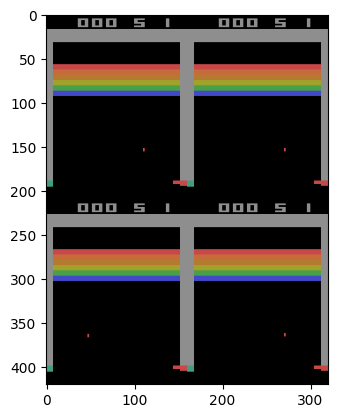

In [34]:
env.reset()
plt.imshow(env.render())

In [35]:
env = VecFrameStack(env, n_stack=4)
model = PPO("CnnPolicy", env, verbose=1)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [46]:
model.learn(total_timesteps=100_000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 603      |
|    ep_rew_mean     | 13.5     |
| time/              |          |
|    fps             | 227      |
|    iterations      | 1        |
|    time_elapsed    | 36       |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 602         |
|    ep_rew_mean          | 13.4        |
| time/                   |             |
|    fps                  | 199         |
|    iterations           | 2           |
|    time_elapsed         | 81          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.088863336 |
|    clip_fraction        | 0.455       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.929      |
|    explained_variance   | 0.791       |
|    learning_rate        | 0.

In [47]:
model.save("Breakout_4_1")
files.download("Breakout_4_1.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
env = make_atari_env("ALE/Breakout-v5", n_envs=1, seed=0)

In [53]:
env = VecFrameStack(env, n_stack=4)

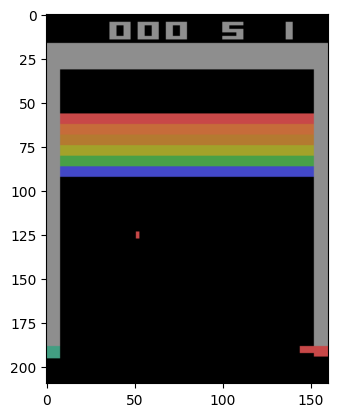

In [54]:
env.reset()
plt.imshow(env.render())

In [55]:
tot_reward = 0
iter = 0

obs = env.reset()
video_filename = 'imageio.mp4'
with imageio.get_writer(video_filename, fps=15) as video:
  for i in range(1,2000):
    iter +=1
    action, _state = model.predict(obs)
    obs, reward, done, info = env.step(action)
    tot_reward = tot_reward + reward
    video.append_data(env.render(mode='rgb_array'))

print("total reward= ", tot_reward)
embed_mp4(video_filename)

total reward=  [184.]
